#### Impedindo notebook de escrever bytecode

In [1]:
import sys
sys.dont_write_bytecode = True

#### Inserindo caminho dos módulos em sys.path

In [2]:
import pathlib
import os
sys.path.append(str(pathlib.Path(os.getcwd()).parent.parent.resolve()))

#### Importando módulos

In [3]:

from modules.point import PointDataset
from modules.classifier import ConvexHullClassifier, KNNClassifier
from random import choices
import pandas as pd
import matplotlib.pyplot as plt

#### Lendo dataset

O dataset vehicle contém 4 classes. Será feita classificação um contra todos para a classe 1.

In [4]:
dataset = PointDataset("./data.dat", labelTranslation={'van ':1, 'saab':-1, 'bus ':-1, 'opel':-1})
points = dataset.getPoints()

#### Criando instância do classificador baseado em envoltória convexa para as features (0, 1)

In [5]:
CHclf01 = ConvexHullClassifier(points, coordinate1=0, coordinate2=1, nFolds=5)
CHresults01 = CHclf01.run()

/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:82: RuntimeWarning: invalid value encountered in double_scalars
  f1 = (2*precision*recall)/(precision + recall)


#### Plotando classificador

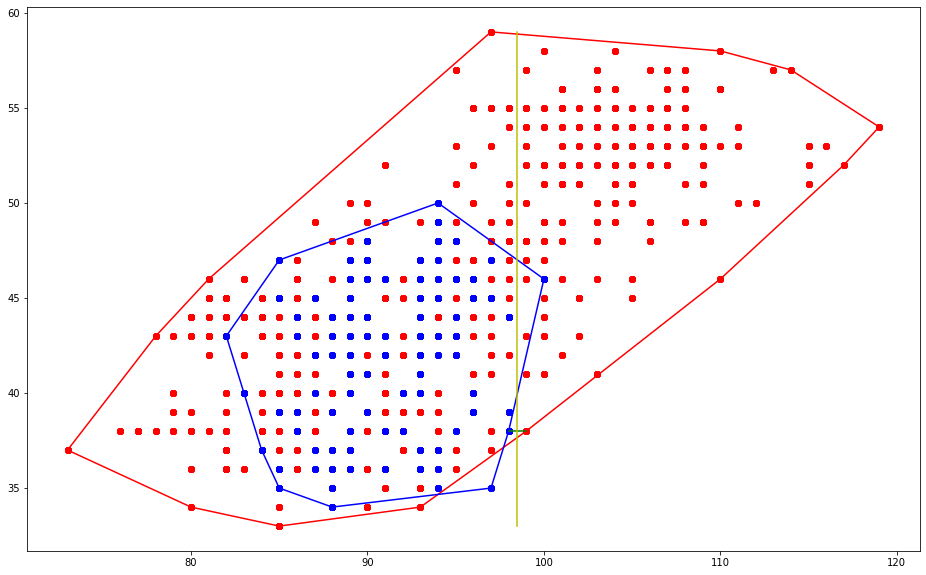

In [6]:
CHclf01.plotHulls()

#### Verificando separabilidade linear dos pontos

In [7]:
CHclf01.linearSeparabilityTest()

False

#### Resultados da validação cruzada com 5 folds

In [8]:
CHresults01["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.029412,0.058824,0.029412,0.584746
1,0.037037,0.028571,0.037037,0.491525
2,0.000000,0.000000,NaN,0.483051
3,0.000000,0.000000,NaN,0.466102
4,0.000000,0.000000,NaN,0.432203


#### Resultados do teste

In [9]:
CHresults01["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.0,0.0,NaN,0.492126


#### Criando instância do classificador baseado em envoltória convexa para as features (0, 2)

In [10]:
CHclf02 = ConvexHullClassifier(points, coordinate1=0, coordinate2=2, nFolds=5)
CHresults02 = CHclf02.run()

#### Plotando classificador

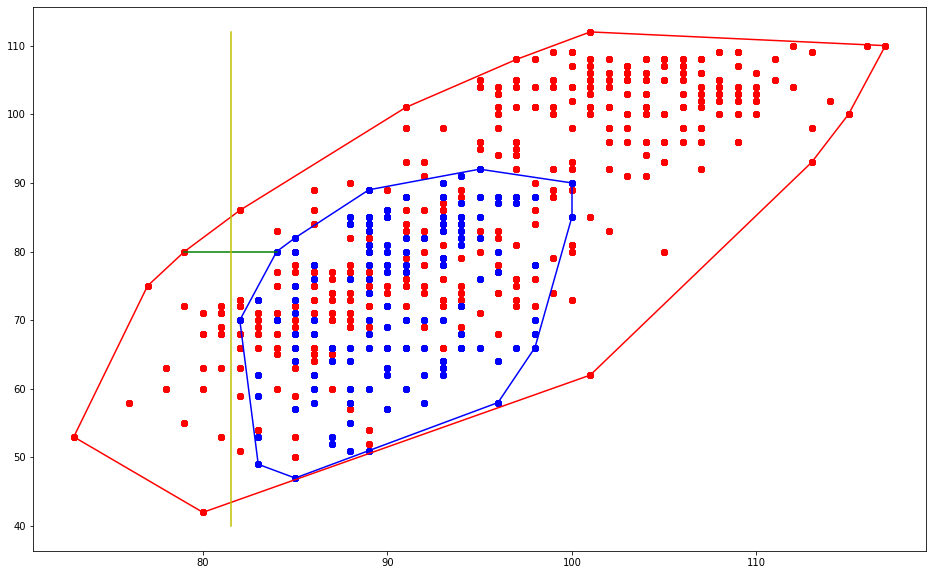

In [11]:
CHclf02.plotHulls()

#### Verificando separabilidade linear dos pontos

In [12]:
CHclf02.linearSeparabilityTest()

False

#### Resultados da validação cruzada com 5 folds

In [13]:
CHresults02["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.292035,1.0,0.292035,0.322034
1,0.194690,1.0,0.194690,0.228814
2,0.272727,1.0,0.272727,0.322034
3,0.254386,1.0,0.254386,0.279661
4,0.265487,1.0,0.265487,0.296610


#### Resultados do teste

In [14]:
CHresults02["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.226337,1.0,0.226337,0.259843


#### Criando instância do classificador baseado em envoltória convexa para as features (1, 2)

In [15]:
CHclf12 = ConvexHullClassifier(points, coordinate1=1, coordinate2=2, nFolds=5)
CHresults12 = CHclf12.run()

/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:61: RuntimeWarning: invalid value encountered in long_scalars
  precision: float = confusionMatrix[0][0] / \


#### Plotando classificador

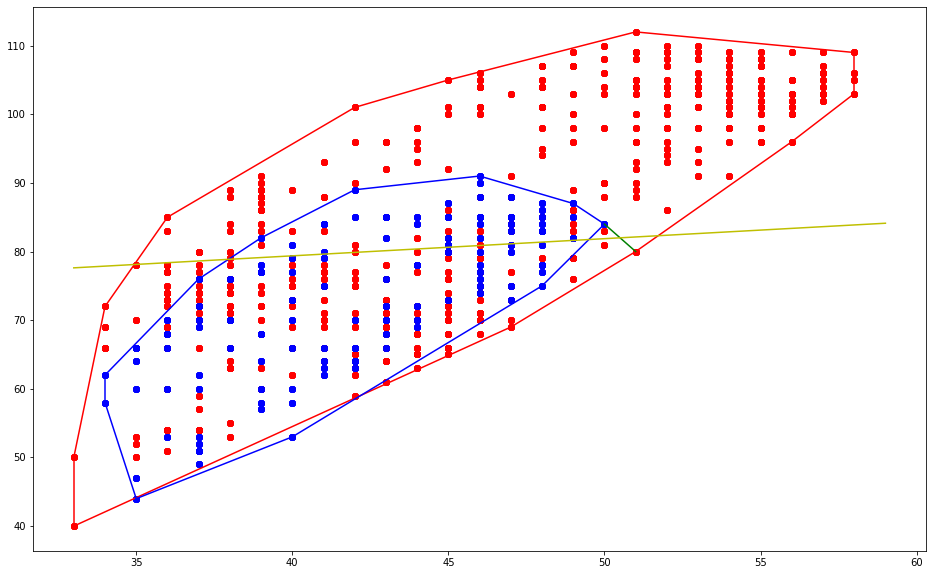

In [16]:
CHclf12.plotHulls()

#### Verificando separabilidade linear dos pontos

In [17]:
CHclf12.linearSeparabilityTest()

False

#### Resultados da validação cruzada com 5 folds

In [18]:
CHresults12["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,NaN,0.0,NaN,0.737288
1,NaN,0.0,NaN,0.889831
2,NaN,0.0,NaN,0.728814
3,NaN,0.0,NaN,0.728814
4,NaN,0.0,NaN,0.779661


#### Resultados do teste

In [19]:
CHresults12["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,NaN,0.0,NaN,0.744094


#### Criando instância do classificador KNN com otimização iterativa do número de vizinhos

A otimização é feita da seguinte forma: validação cruzada com 5 folds é executada para classificador, variando o número de vizinhos de 1 a _maxK_. É escolhido o número de vizinhos que apresenta a melhor _F1 Score_ média entre os folds. Se _makK_ não for passado, _maxK_ é igual à raíz quadrada do tamanho do dataset.

In [20]:
KNNclf = KNNClassifier(points, maxK=30, nFolds=5)
KNNresults = KNNclf.run()

#### Resultados da validação cruzada com 5 folds

In [21]:
KNNresults["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.843750,0.818182,0.843750,0.906780
1,0.793103,0.821429,0.793103,0.906780
2,0.833333,1.000000,0.833333,0.949153
3,0.826087,0.826087,0.826087,0.932203
4,0.916667,0.970588,0.916667,0.966102


#### Resultados do teste

In [22]:
KNNresults["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.818182,0.9,0.818182,0.940945
